In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mtcars = pd.read_csv("mtcars.csv")
mtcars=mtcars[['hp','disp','mpg']]
mtcars

,hp,disp,mpg
0,110,160.0,21.0
1,110,160.0,21.0
2,93,108.0,22.8
3,110,258.0,21.4
4,175,360.0,18.7
5,105,225.0,18.1
6,245,360.0,14.3
7,62,146.7,24.4
8,95,140.8,22.8
9,123,167.6,19.2


In [ ]:
y = mtcars["mpg"]
X = mtcars[["hp","disp"]]

In [ ]:
def standardize(X):
    return (X - X.mean())/X.std(), X.mean(), X.std()

X,muX,sdX = standardize(X)
y,muy,sdy = standardize(y)

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.intercept_

4.661287958413497e-16

In [ ]:
lr.coef_

array([-0.28258203, -0.62404352])

In [ ]:
def predict(X,w0,w):
    return w0 + np.dot(X,w)

In [ ]:
def sse(y,ypred):
    return np.sum((ypred-y)**2)

Note that the linear regression model is
$$y=w_0+w_1x_1+w_2x_2$$
We want to minimize SSE
$$SSE=\sum_{i=1}^{n}[y-w_0-w_1x_{i1}-w_2x_{i2}]^2$$
Hence the gradients can be written as
$$\frac{\partial SSE}{\partial w_0}=2\sum_{i=1}^{n}[y-w_0-w_1x_{i1}-w_2x_{i2}]*-1$$
$$\frac{\partial SSE}{\partial w_1}=2\sum_{i=1}^{n}[y-w_0-w_1x_{i1}-w_2x_{i2}]*-x_{i1}$$
$$\frac{\partial SSE}{\partial w_2}=2\sum_{i=1}^{n}[y-w_0-w_1x_{i1}-w_2x_{i2}]*-x_{i2}$$

In [ ]:
def gradient(y,ypred,X,num_var):
    grad_w0 =-np.sum(y-ypred)
    grad_w = np.zeros(num_var)
    for j in range(num_var):
        grad_w[j]=-np.sum((y-ypred)*X.iloc[:,j])
    return grad_w0,grad_w

In [ ]:
def update_param(w0,w,grad_w0,grad_w,alpha):
    w0_new = w0 - alpha * grad_w0
    w_new = np.zeros(len(w))
    for i in range(len(w)):
        w_new[i] = w[i] - alpha * grad_w[i]
    return w0_new,w_new

5.040412531798211e-16 [-0.28258203 -0.62404352]


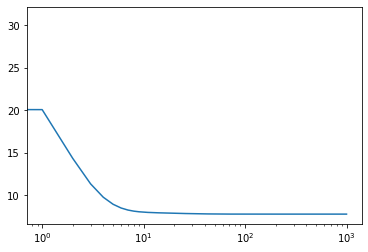

In [ ]:
#Gradient Descent
w0 = 0
w = [0,0]
alpha = 0.005
num_iter = 1000
SSE_list = []
for i in range(num_iter):
    ypred = predict(X,w0,w)
    J = sse(y,ypred)
    SSE_list.append(J)
    grad_w0, grad_w = gradient(y,ypred,X,num_var=2)
    w0, w = update_param(w0,w,grad_w0,grad_w,alpha)

plt.plot(SSE_list)
plt.xscale('log')
print(w0,w)

Recall that in stochastic gradient descent we pass a single observation at a time, calculate the cost and update the parameters. Hence we are not obtaining the true direction that minimizes the sum of square errors, but may help us to obtain global optimum in case there are multiple local minimas.
$$Error=[y_i-w_0-w_1x_{i1}-w_2x_{i2}]^2$$
Hence the gradient at the point can be written as
$$\frac{\partial SSE}{\partial w_0}=2[y_i-w_0-w_1x_{i1}-w_2x_{i2}]*-1$$
$$\frac{\partial SSE}{\partial w_1}=2[y_i-w_0-w_1x_{i1}-w_2x_{i2}]*-x_{i1}$$
$$\frac{\partial SSE}{\partial w_2}=2[y_i-w_0-w_1x_{i1}-w_2x_{i2}]*-x_{i2}$$

In [ ]:
def gradientatSinglePoint(y,ypred,x,num_var):
    grad_w0 = -1*(y-ypred)
    grad_w = np.zeros(num_var)
    for j in range(num_var):
        grad_w[j]=-1*(y-ypred)*x[j]
    return grad_w0,grad_w

In [ ]:
#Stochastic Gradient Descent
SSE_list = []
w0 = 0
w = [0,0]
alpha = 0.005
#pass over the whole data set 500 times
for k in range(1000):
    for i in range(len(X)):
        #Make prediction for one point
        ypred = predict(X.iloc[i,:],w0,w)
        #compute errors at that point
        J = sse(y[i],ypred)
        SSE_list.append(J)
        grad_w0, grad_w = gradientatSinglePoint(y[i],ypred,X.iloc[i,:],num_var=2)
        #update the parameters by using the gradient at single point
        w0, w = update_param(w0,w,grad_w0,grad_w,alpha)

0.006486243044896319 [-0.28167617 -0.62716372]


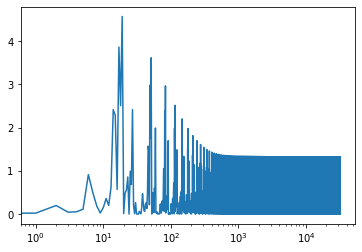

In [ ]:
plt.plot(SSE_list)
plt.xscale('log')
print(w0,w)

In [ ]:
X.iloc[0,:]